# <span style="color:orange">Entropy387 Task</span>

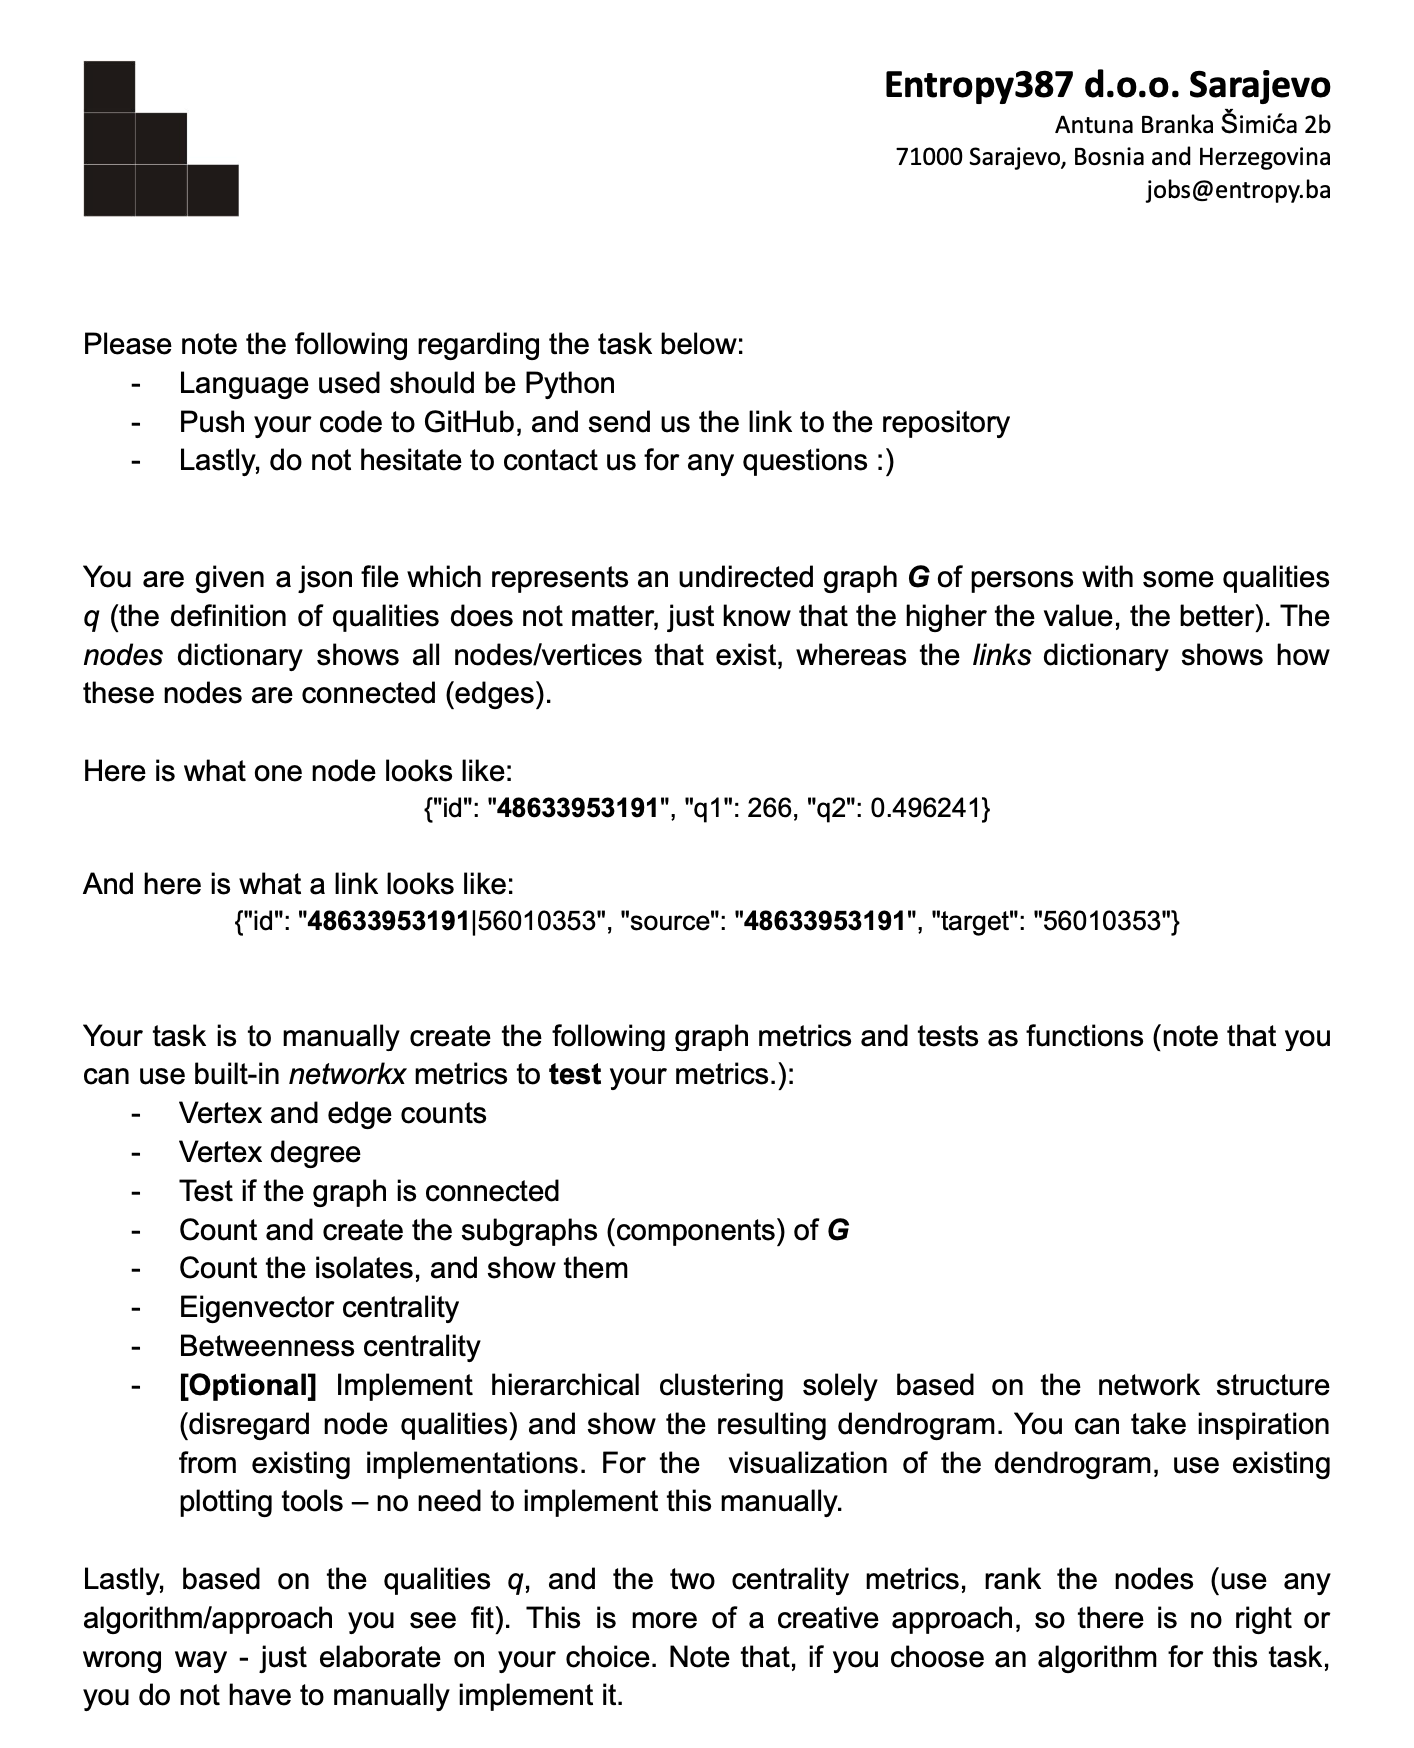

In [1182]:
# Loading the dataset from the JSON file
with open('/Users/ivanakolorici-livnjak/Desktop/challenge_graph.json', 'r') as f:
    dataset = json.load(f)

In [1185]:
import numpy as np
import json
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import defaultdict
from typing import Dict, Tuple
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print(nx.__version__)
print(sp.__version__)


3.1
1.10.1


In [1186]:
G = nx.Graph()
node_labels = [node['id'] for node in dataset['nodes']]
G.add_nodes_from(node_labels)
G.add_edges_from([(link['source'], link['target']) for link in dataset['links']])

### Graph Visualization using Gephi

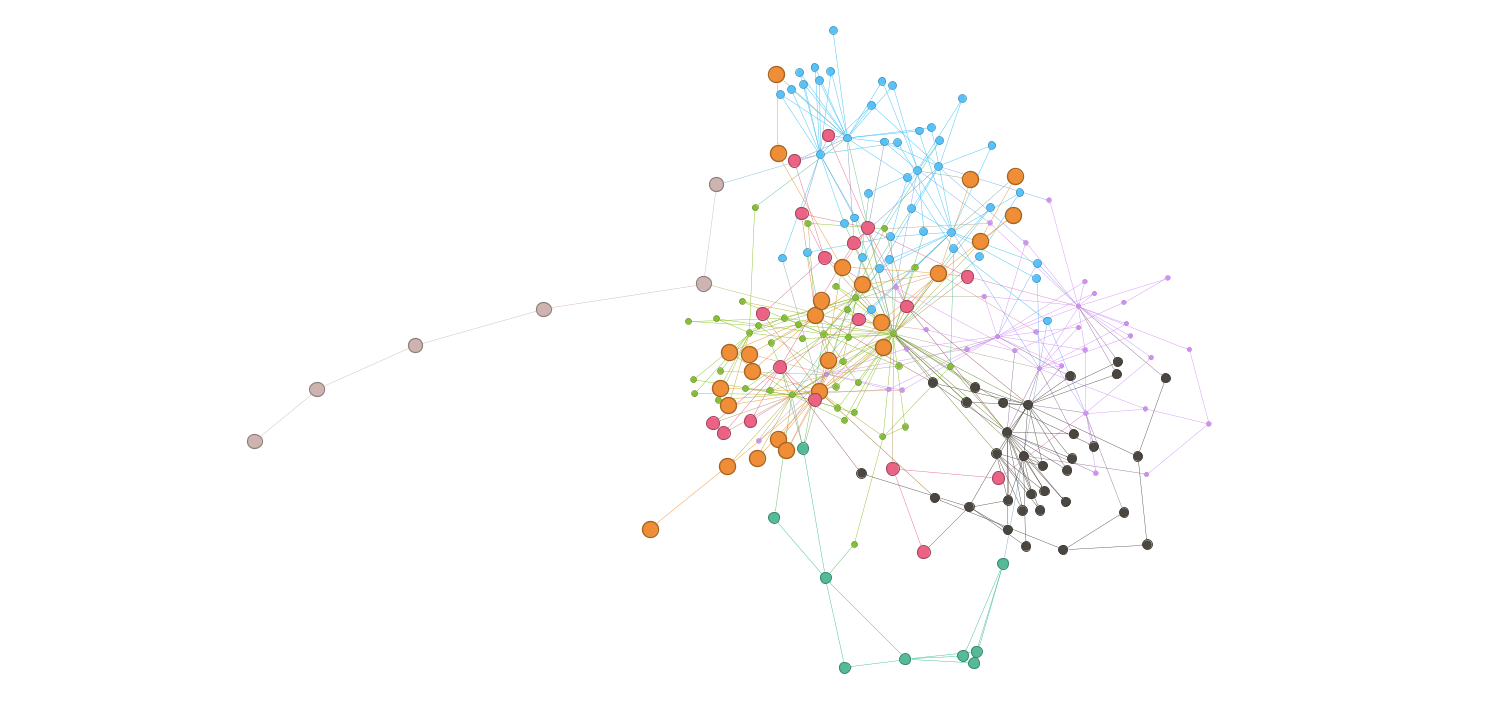

 ### <span style="color:green">Vertex and edge counts (manually)</span>

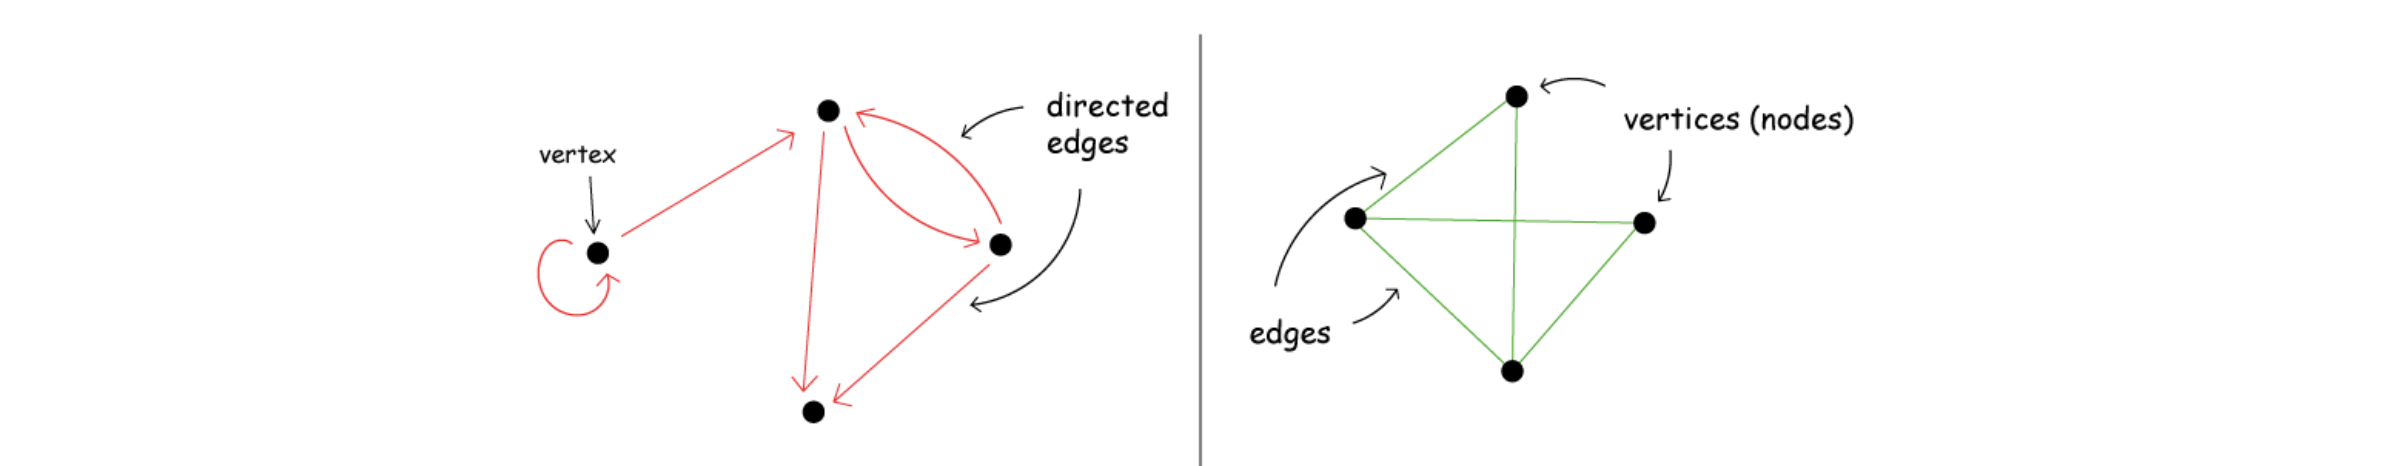

In [1187]:
# Initializing the vertex and edge counts
num_nodes_m = 0
num_edges_m = 0

# Iterating over the nodes and edges to count them
for node in dataset['nodes']:
    num_nodes_m += 1
for edge in dataset['links']:
    num_edges_m += 1

# Vertex and edge counts
print("Number of nodes:", num_nodes_m)
print("Number of edges:", num_edges_m)

Number of nodes: 3506
Number of edges: 3756


#### <span style="color:brown">Vertex and edge counts (networkx)</span>

In [1188]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Number of nodes: 3506
Number of edges: 3756


 ### <span style="color:green">Vertex degree (manually)</span>

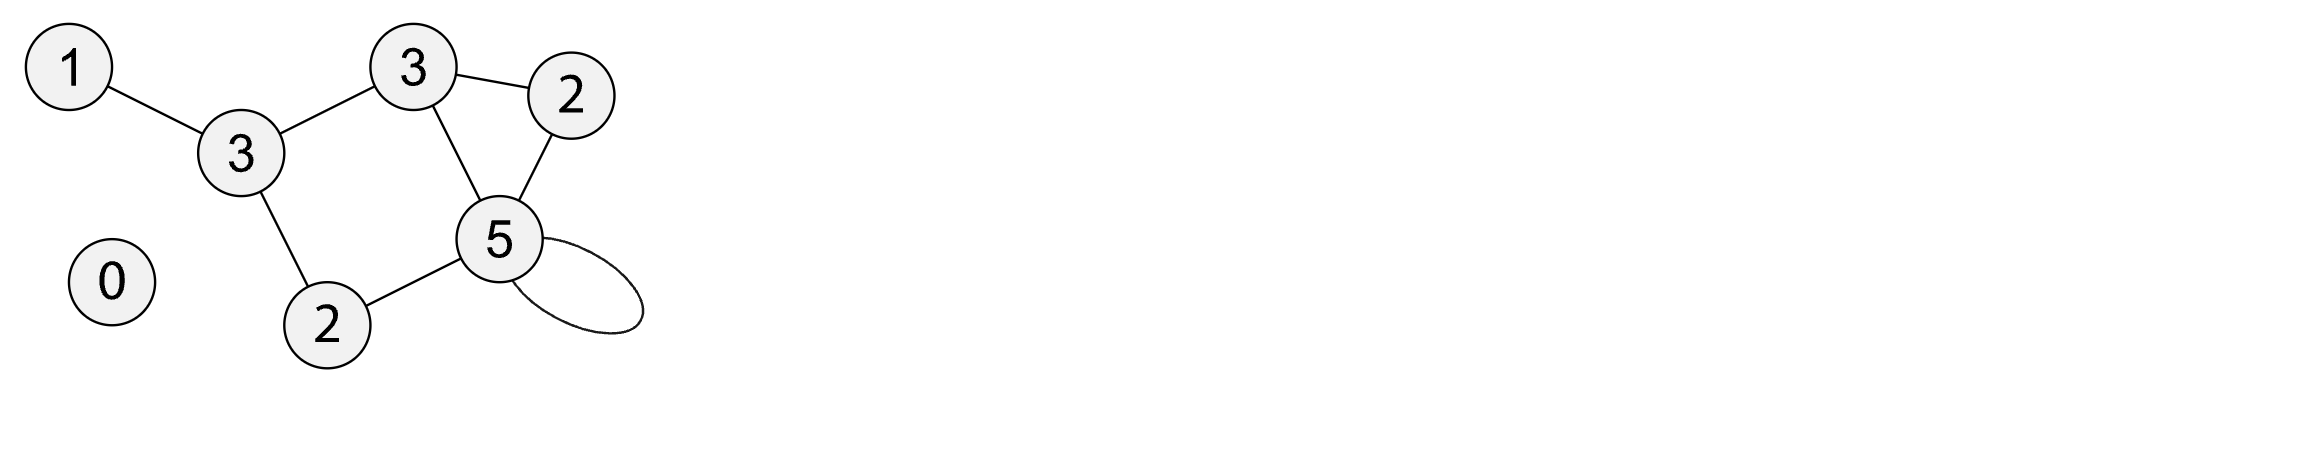

The Degree of a vertex is the number of edges incident to the vertex.
- I started from an empty dictionary "degree".
- Using the dictionary comprehension I created entries in the dictionary for each node in the graph.
- Then I iterated over each edge using the fact that the edge connects the source and target, therefore increasing the value of the degree by one.
- At the end, the degree dictionary is returned, and it contains the updated degree values for each vertex in the graph.

The graph is represented as G = (V, E)
* V - set of nodes: dataset ['nodes'] = {v1, v2, ..., vn}
* E - set of edges: dataset ['links'] = {e1, e2, ..., em}.

The formula for the given code is:

##### deg(vi) = |{e in E: vi is incident to e}| for each vertex vi in V.

In [1189]:
def vertex_degree(dataset):

    nodes = dataset['nodes']
    edges = dataset['links']
    
    # Create an empty dictionary to store the degree of each vertex
    degree = {node['id']: 0 for node in nodes}
    
    # Count the number of edges incident to each vertex
    for edge in edges:
        source = edge['source']
        target = edge['target']
        degree[source] += 1
        degree[target] += 1
    
    return degree


In [1229]:
degree = vertex_degree(dataset)
print("Vertex degrees:")
print(pd.DataFrame.from_dict(degree, orient='index', columns=['degree']).head(5))

Vertex degrees:
             degree
48633953191      45
1438155667       50
37754729913      38
45694946584      50
8048097398       50


In [1191]:
avg_degree = sum(dict(G.degree()).values()) / num_nodes
print(f'Average degree: {avg_degree:.2f}')

Average degree: 2.14


 #### <span style="color:brown">Vertex degree (networkx)</span>

In [1235]:
# Converting the dataset into a networkx graph object
G = nx.Graph()
for node in dataset['nodes']:
    G.add_node(node['id'], q1=node['q1'], q2=node['q2'])
for link in dataset['links']:
    G.add_edge(link['source'], link['target'], id=link['id'])

# Computing the degree of each node in the graph
degree = dict(G.degree())
print(pd.DataFrame.from_dict(degree, orient='index', columns=['degree']).head())



             degree
48633953191      45
1438155667       50
37754729913      38
45694946584      50
8048097398       50


In [1193]:
avg_degree = sum(dict(G.degree()).values()) / num_nodes
print(f'Average degree: {avg_degree:.2f}')

Average degree: 2.14


 ### <span style="color:green">Testing if the graph is connected (manually)</span>

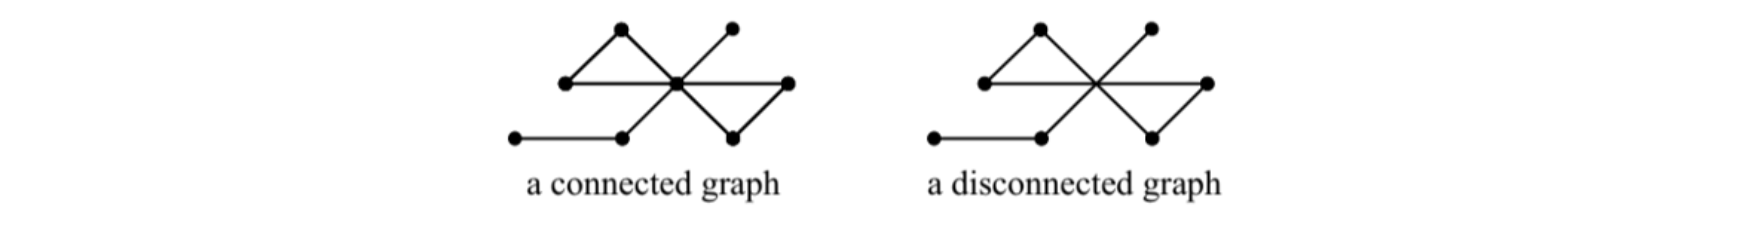

A connected graph is a graph in which we can get from one vertex to any other vertex by traversing the edges of the graph.

The second graph is disconnected because there is no way to travel from one selected node to another one by following the edges. We can only switch from one edge to another one through a node connecting them. It doesn't matter that the edges are overlapped.

So, by checking whether all vertices can be reached from a starting vertex we can check if the graph is connected.
- A graph dataset that contains of a list of nodes and edges, is taken.
- An empty dictionary called 'neighbors' was created for storing vertices.
- Each vertex in the neighbors dictionary starts off with an empty set.
- The visited set and stack list are used to perform a depth-first search (DFS) on the graph. The DFS algorithm starts at a node and explores as far as possible along each branch before backtracking. In this code, the DFS algorithm starts at a random vertex and explores the graph by visiting all its neighbors. The visited set keeps track of the nodes that have already been visited by the algorithm, and the stack list keeps track of the nodes that still need to be visited.
- The idea is to see whether all vertices in the graph have been visited by comparing the length of the visited set with the length of the nodes list. If they are equal, the graph is connected; otherwise, it is not.

##### G = (V, E)

##### neighbors(v) = {u | (u,v) ∈ E ∨ (v,u) ∈ E}

##### visited = DFS(G, v)

##### is_connected(G) = (visited = V)

DFS(G, v) is the set of vertices visited in a depth-first search starting from vertex v in graph G.

So,
##### is_connected(dataset) = (visited = V)

In [1194]:
def is_connected(dataset):
   
    nodes = dataset['nodes']
    edges = dataset['links']
    
    # Creating a dictionary to store the neighbors of each vertex
    neighbors = {node['id']: set() for node in nodes}
    
    # Populating the dictionary with the neighbors of each vertex
    for edge in edges:
        source = edge['source']
        target = edge['target']
        neighbors[source].add(target)
        neighbors[target].add(source)
    
    # Performing a search from a random vertex
    visited = set()
    stack = [nodes[0]['id']]
    while stack:
        node = stack.pop()
        visited.add(node)
        for neighbor in neighbors[node]:
            if neighbor not in visited:
                stack.append(neighbor)
    
    # If all vertices have been visited, the graph is connected
    return len(visited) == len(nodes)


In [1195]:
connected = is_connected(dataset)
if connected:
    print("The graph is connected.")
else:
    print("The graph is not connected.")


The graph is not connected.


 #### <span style="color:brown">Testing if the graph is connected (networkx)</span>

In [1196]:
def is_connected(G):
    return nx.is_connected(G)
nx.is_connected(G)

False

 ### <span style="color:green">Count and create the subgraphs (components) of G (manually)</span>

#### Gephi visualization for subgraphs of our dataset. We can see 4 subgraphs.

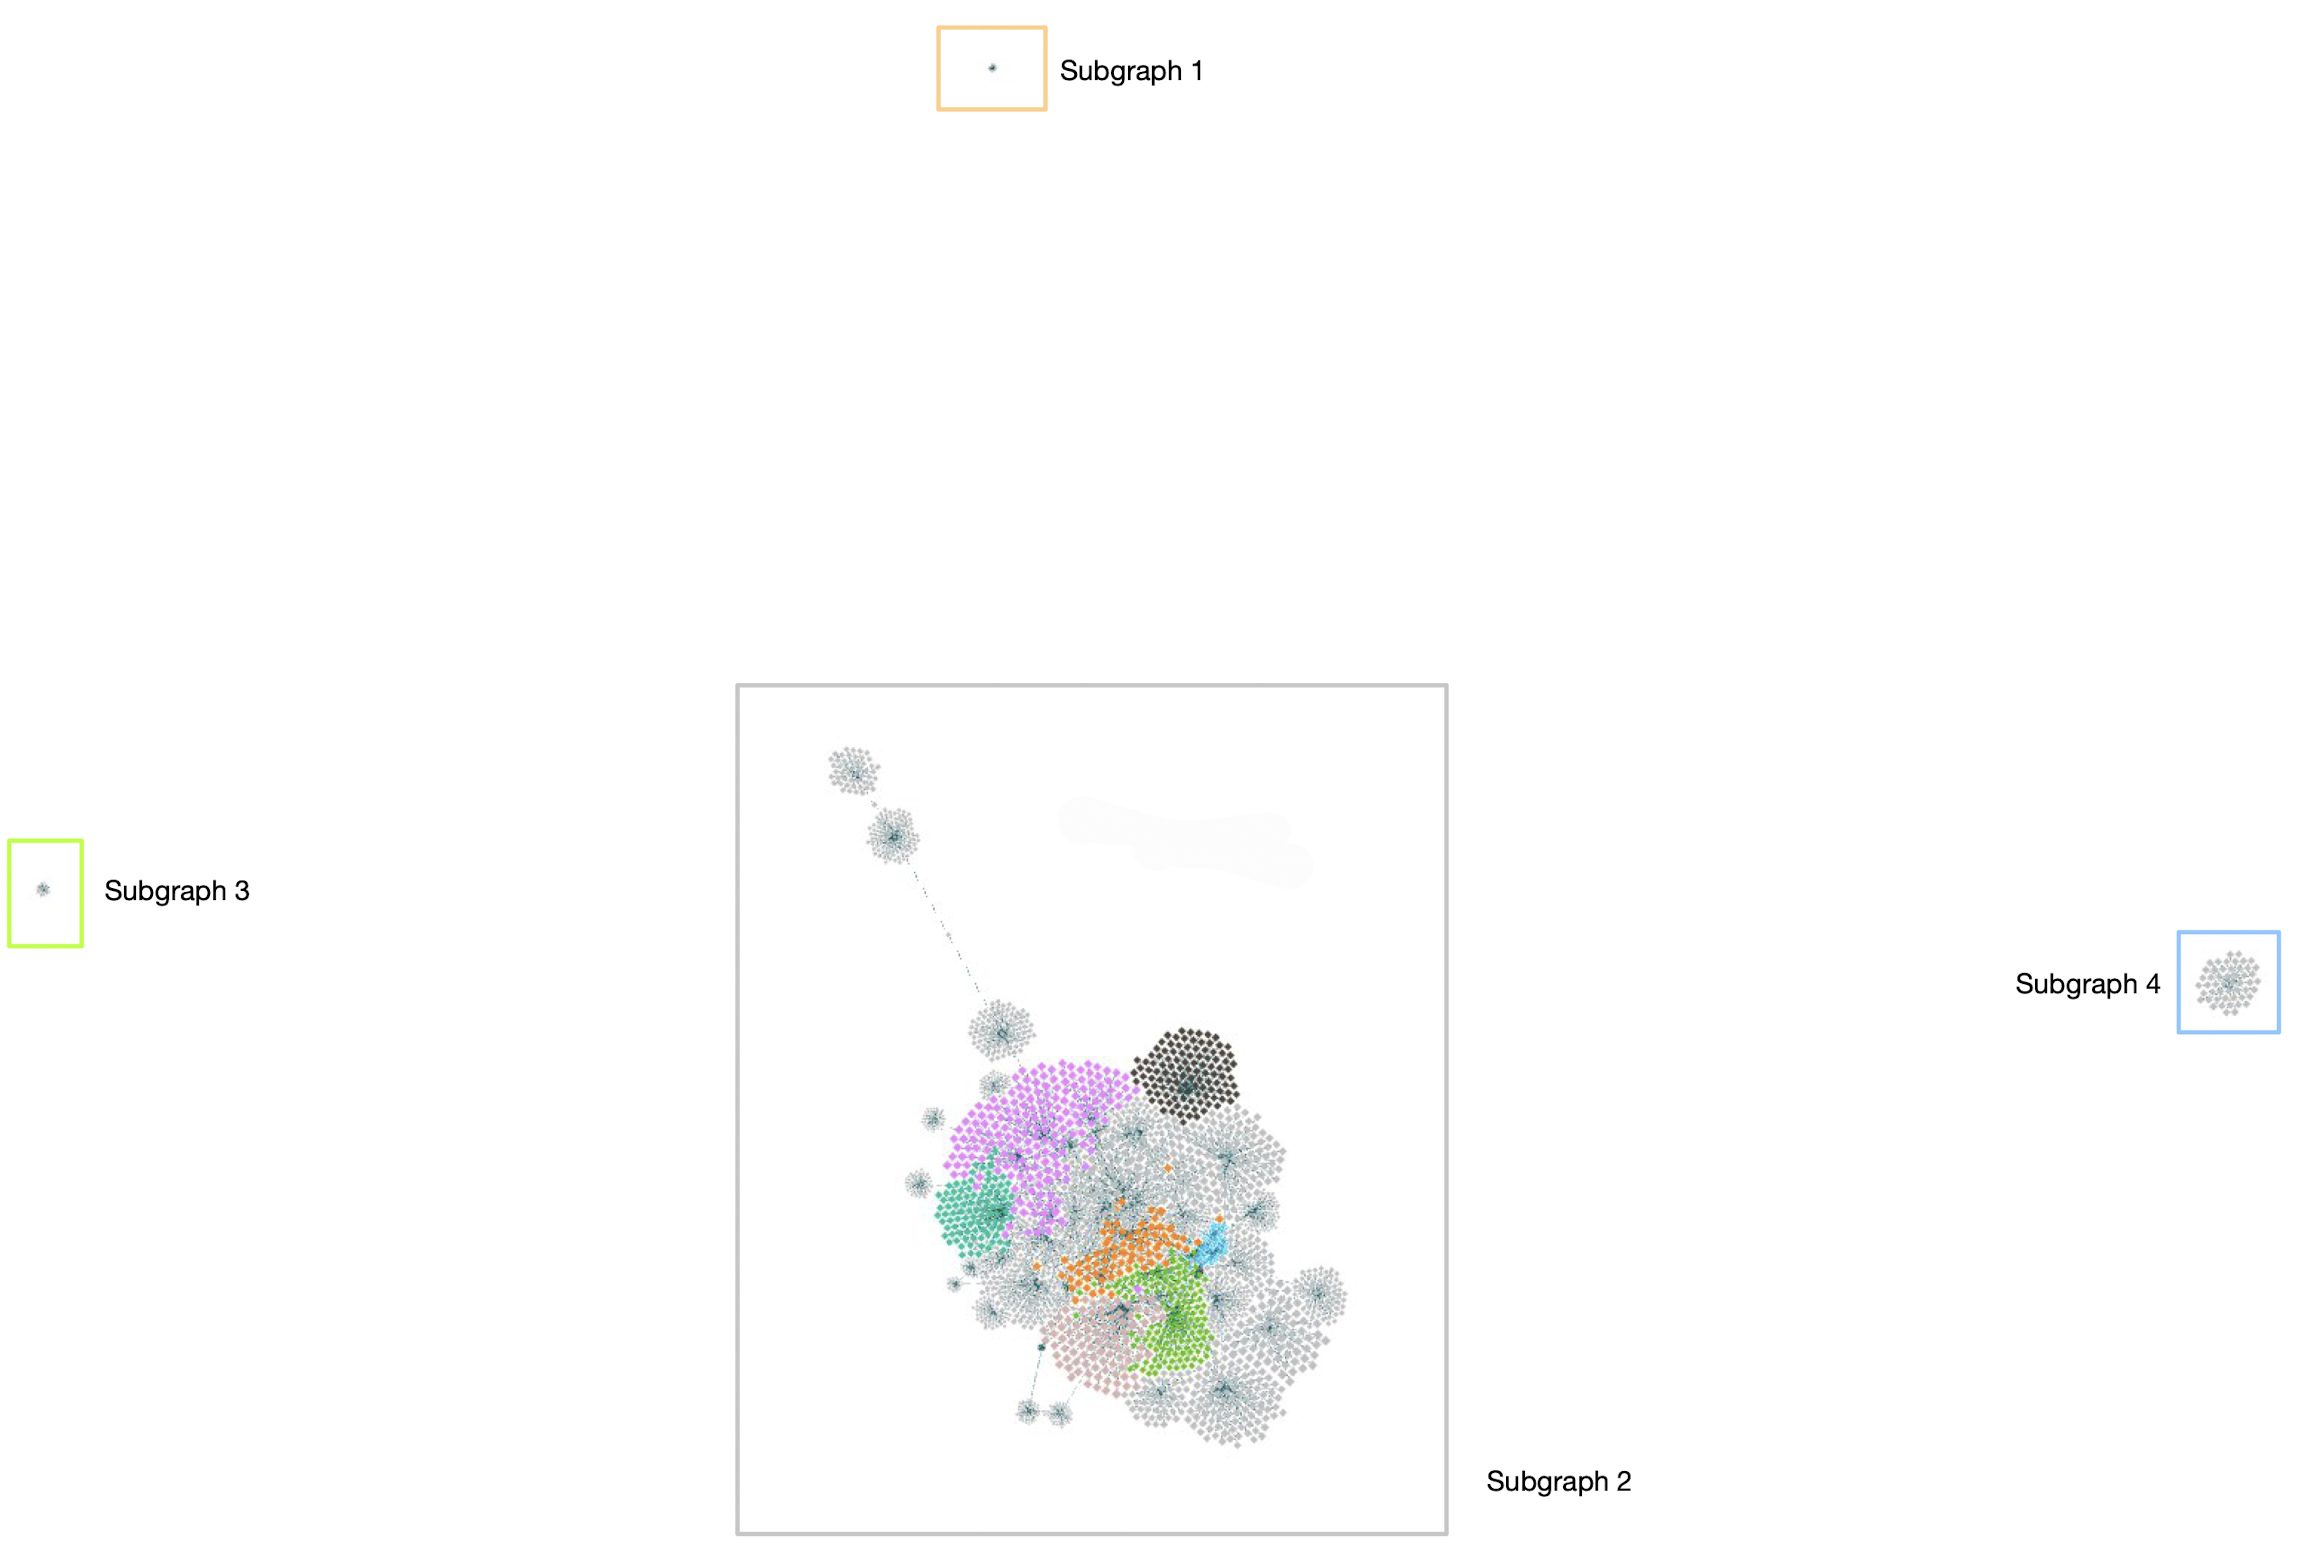

The same neighbors dictionary is used.
By adding:  *subgraph['links'].append({'id': node + '|' + neighbor, 'source': node, 'target': neighbor})*

For each unvisited neighbor of the current node, the neighbor is added to the stack for future exploration, and an edge is added to the subgraph dictionary between the current node and the neighbor. The id field is set to a string that uniquely identifies the edge, using the node and neighbor IDs, separated by a pipe symbol |. The source and target fields are set to the IDs of the nodes at either end of the edge.

By doing this for every unvisited neighbor of every unvisited node, the algorithm builds up subgraphs that consist of connected nodes and edges.

##### G = (V, E)
##### neighbors(v) = {u | (u,v) ∈ E ∨ (v,u) ∈ E}
##### visited = {}
##### subgraphs = []
##### for v in V:
        if v not in visited:
        visited

In [1199]:
def get_subgraphs(dataset):
    
    nodes = dataset['nodes']
    edges = dataset['links']
    
    # Creating a dictionary to store the neighbors of each vertex
    neighbors = {node['id']: set() for node in nodes}
    
    # Populating the dictionary with the neighbors of each vertex
    for edge in edges:
        source = edge['source']
        target = edge['target']
        neighbors[source].add(target)
        neighbors[target].add(source)
    
    # Performing a depth-first search from each vertex to find the subgraphs
    visited = set()
    subgraphs = []
    for node in nodes:
        if node['id'] not in visited:
            subgraph = {'nodes': [], 'links': []}
            stack = [node['id']]
            while stack:
                node = stack.pop()
                visited.add(node)
                subgraph['nodes'].append(node)
                for neighbor in neighbors[node]:
                    if neighbor not in visited:
                        stack.append(neighbor)
                        subgraph['links'].append({'id': node + '|' + neighbor, 'source': node, 'target': neighbor})
            subgraphs.append(subgraph)
    
    return subgraphs


In [1200]:
subgraphs = get_subgraphs(dataset)
print(f"The graph has {len(subgraphs)} subgraphs:")
for i, subgraph in enumerate(subgraphs):
    print(f"Subgraph {i+1}: {len(subgraph['nodes'])} nodes, {len(subgraph['links'])} edges")

The graph has 4 subgraphs:
Subgraph 1: 46 nodes, 45 edges
Subgraph 2: 3612 nodes, 3611 edges
Subgraph 3: 51 nodes, 50 edges
Subgraph 4: 51 nodes, 50 edges


 #### <span style="color:brown">Count and create the subgraphs (components) of G (networkx)</span>

In [1201]:
def count_subgraphs(G):
    return nx.number_connected_components(G)

subgraph=nx.number_connected_components(G)
print(f"The graph has {len(subgraphs)} subgraphs:")
for i, subgraph in enumerate(subgraphs):
        print(f"Subgraph {i+1}: {len(subgraph['nodes'])} nodes, {len(subgraph['links'])} edges")


The graph has 4 subgraphs:
Subgraph 1: 46 nodes, 45 edges
Subgraph 2: 3612 nodes, 3611 edges
Subgraph 3: 51 nodes, 50 edges
Subgraph 4: 51 nodes, 50 edges


 ### <span style="color:green">Count the isolates, and show them (manually)</span>

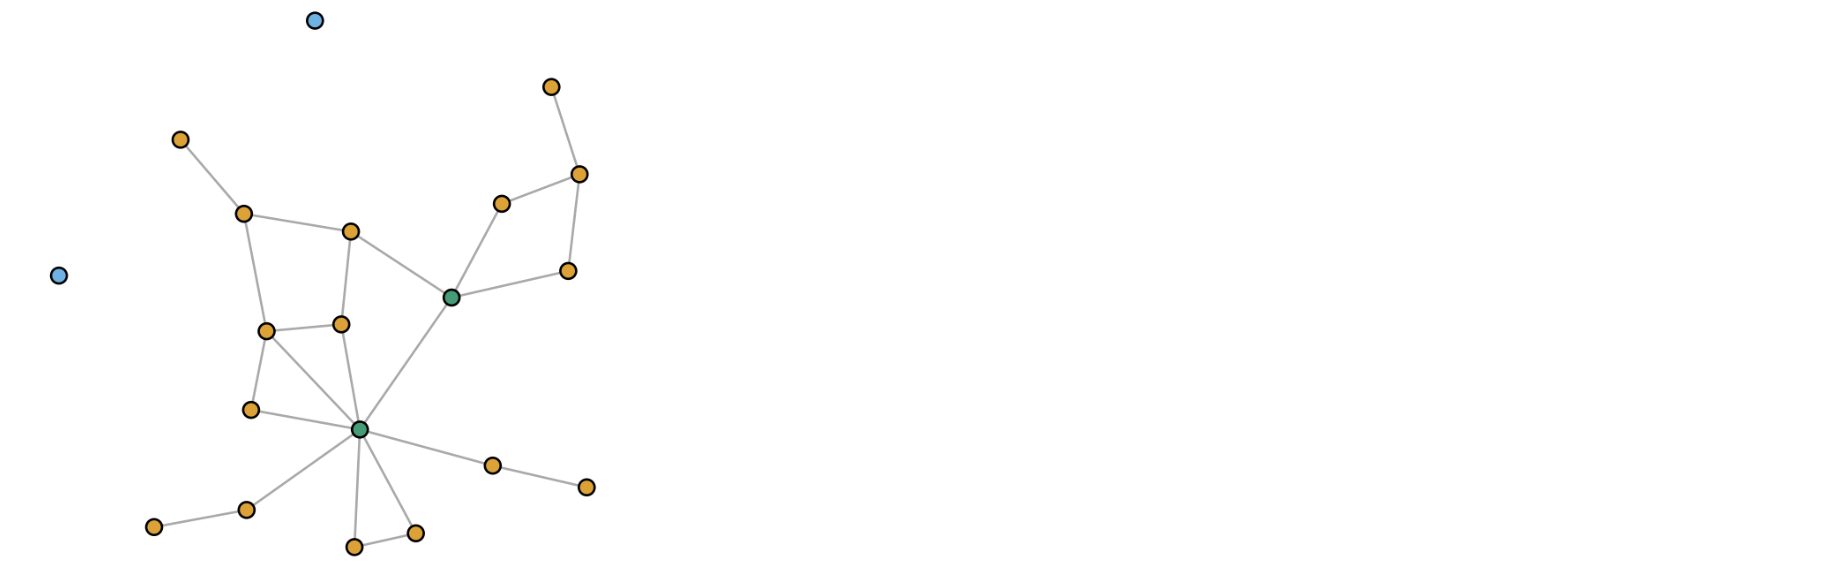

The code first creates a set vertices_with_edges to store all the vertices that have at least one edge in the graph. It does this by iterating over the edges in the edges list and adding the source and target vertices to the vertices_with_edges set.

Next, the code creates an empty list 'isolates' to store the vertices that have no edges in the graph. It iterates over the nodes list and checks if each node's id is not in the vertices_with_edges set. If the node is not connected to any edges, it is considered an isolate and is appended to the isolates list as a dictionary with only the 'id' key and its value.

The function get_isolates mathematically:

##### get_isolates(dataset) = { node['id'] | node ∈ nodes ∧ node['id'] ∉ vertices_with_edges }

In [1202]:
def get_isolates(dataset):
    
    nodes = dataset['nodes']
    edges = dataset['links']
    
    # Creating a set of all vertices with edges
    vertices_with_edges = set()
    for edge in edges:
        source = edge['source']
        target = edge['target']
        vertices_with_edges.add(source)
        vertices_with_edges.add(target)
    
    # Creating a list of all vertices with no edges
    isolates = []
    for node in nodes:
        if node['id'] not in vertices_with_edges:
            isolates.append({'id': node['id']})
    
    return isolates


In [1203]:
isolates = get_isolates(dataset)
print(f"The graph has {len(isolates)} isolates:")
for isolate in isolates:
    print(isolate['id'])

The graph has 0 isolates:


 #### <span style="color:brown">Count the isolates, and show them (networkx)</span>

In [1204]:
# Counting the isolates, and show them
def count_isolates(G):
    return len(list(nx.isolates(G)))
len(list(nx.isolates(G)))

0

In [1205]:
def show_isolates(G):
    return list(nx.isolates(G))
list(nx.isolates(G))

[]

##### There are no isolates!

 ### <span style="color:green">Eigenvector centrality (manually)</span>

It measures the importance of a node in a graph as a function of the importance of its neighbors. If a node is connected to highly important nodes, it will have a higher Eigen Vector Centrality score as compared to a node which is connected to lesser important nodes.

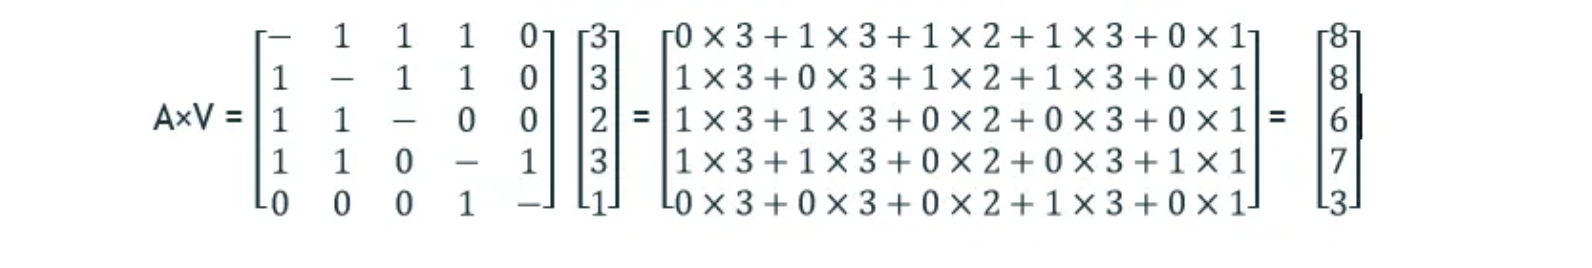

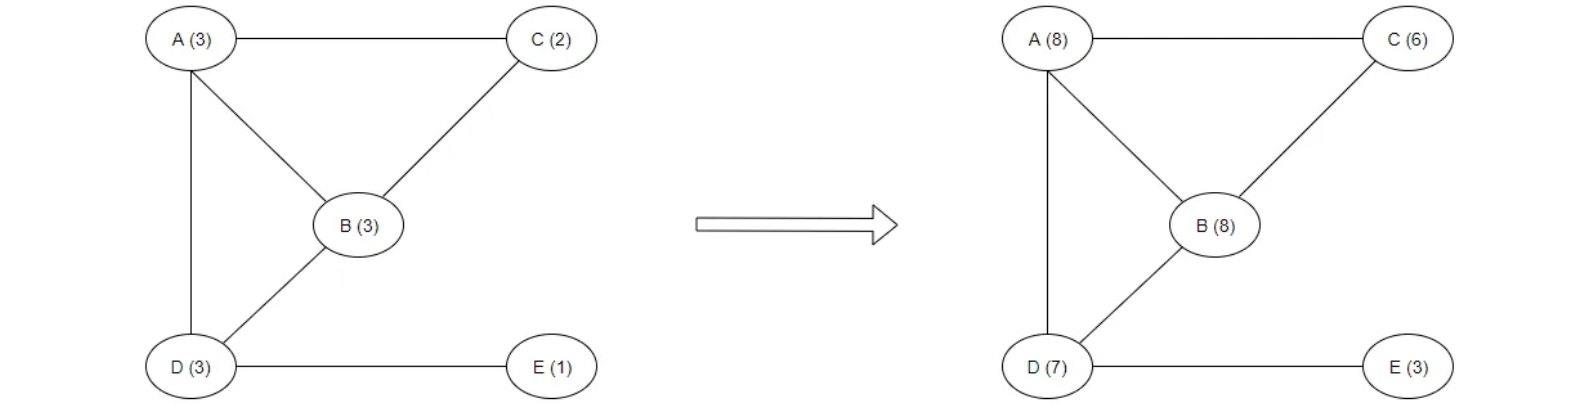

- An adjacency matrix is created for the graph using the information in nodes and links. The adjacency matrix is a square matrix where the entry at position (i, j) is 1 if there is an edge from node i to node j, and 0 otherwise.

- The matrix is normalized by dividing each row by the degree of the corresponding node. This makes the matrix more numerically stable and ensures that the resulting eigenvector centrality scores are comparable across graphs of different sizes.

- The eigenvector centrality vector is initialized to a random vector with entries between 0 and 1. The vector is then normalized to sum to 1.

- The power iteration method is then used to iteratively update the eigenvector centrality vector until it converges to the dominant eigenvector of the normalized adjacency matrix. At each iteration, the vector is multiplied by the normalized adjacency matrix and normalized again to ensure that its entries sum to 1. The iteration continues until either the maximum number of iterations is reached or the difference between the current and previous vectors is less than a certain tolerance.

- Finally, the code creates a dictionary mapping each node ID to its eigenvector centrality score and returns the dictionary.


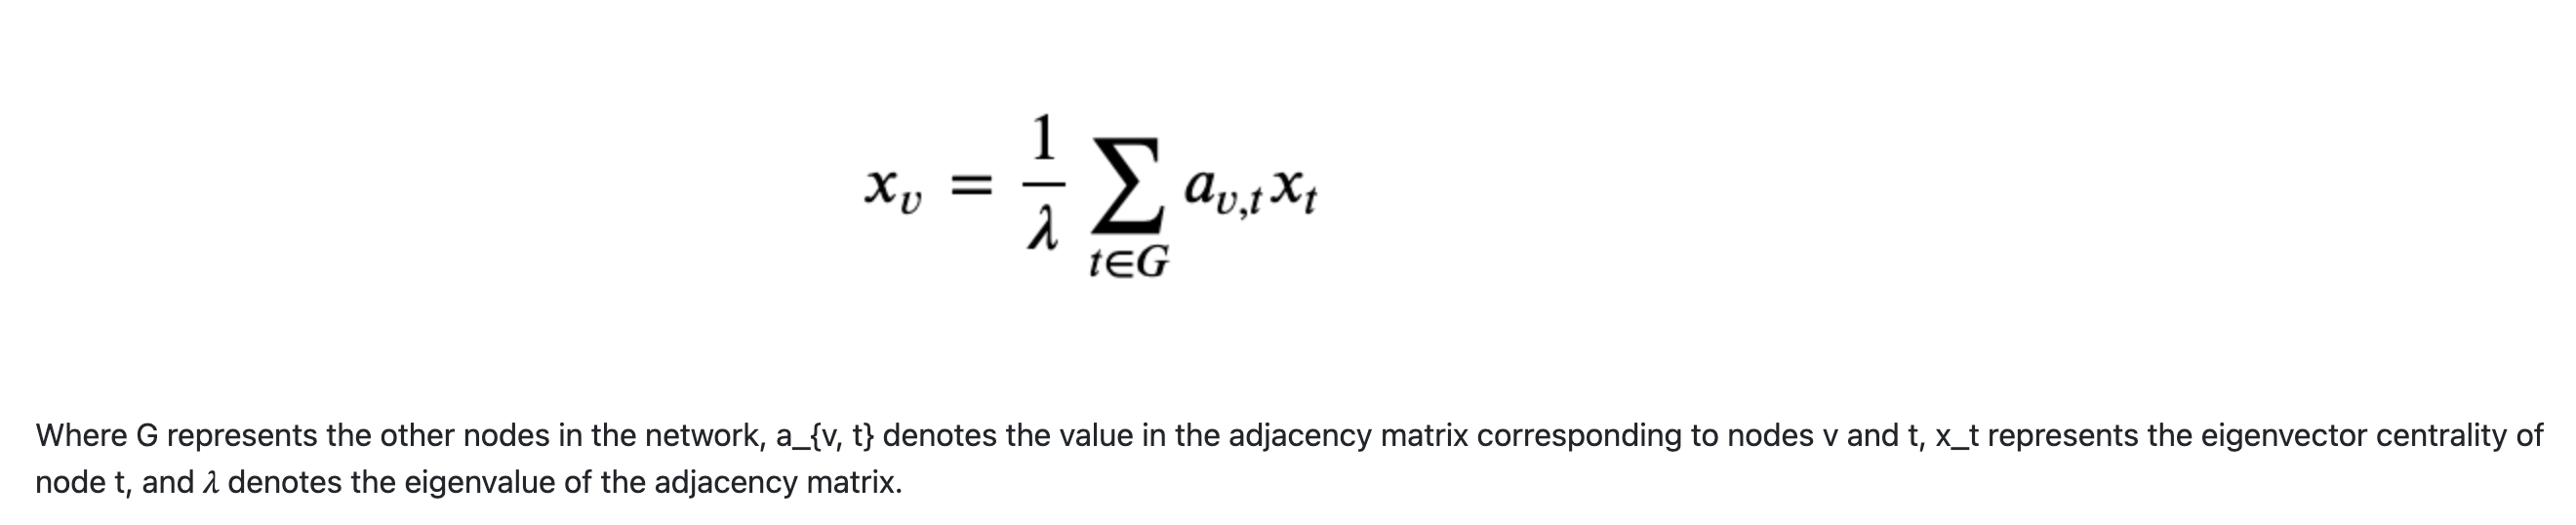

In [1206]:
def calculate_eigenvector_centrality_power_iteration(dataset, max_iterations=1000, tolerance=1e-6):

    nodes = dataset['nodes']
    edges = dataset['links']
    
    # Creating adjacency matrix
    adjacency_matrix = np.zeros((len(nodes), len(nodes)))
    for edge in edges:
        source_index = next((i for i, node in enumerate(nodes) if node['id'] == edge['source']), None)
        target_index = next((i for i, node in enumerate(nodes) if node['id'] == edge['target']), None)
        if source_index is not None and target_index is not None:
            adjacency_matrix[source_index][target_index] = 1
            adjacency_matrix[target_index][source_index] = 1
    
    # Normalizing adjacency matrix
    degree_vector = np.sum(adjacency_matrix, axis=1)
    degree_matrix = np.diag(degree_vector)
    degree_matrix_inv_sqrt = np.linalg.inv(np.sqrt(degree_matrix))
    normalized_adjacency_matrix = np.matmul(np.matmul(degree_matrix_inv_sqrt, adjacency_matrix), degree_matrix_inv_sqrt)
    
    # Initializing eigenvector centrality vector
    eigenvector_centrality = np.random.rand(len(nodes))
    eigenvector_centrality /= np.sum(eigenvector_centrality)
    
    # Power iteration method
    for i in range(max_iterations):
        prev_centrality = eigenvector_centrality
        eigenvector_centrality = np.matmul(normalized_adjacency_matrix, eigenvector_centrality)
        eigenvector_centrality /= np.linalg.norm(eigenvector_centrality)
        if np.linalg.norm(eigenvector_centrality - prev_centrality) < tolerance:
            break
            
    # Normalizing the eigenvector centrality scores
    max_centrality = max(eigenvector_centrality)
    eigenvector_centrality = eigenvector_centrality / max_centrality
    
    # Creating dictionary mapping node IDs to eigenvector centrality scores
    centrality_dict = {}
    for i, node in enumerate(nodes):
        centrality_dict[node['id']] = eigenvector_centrality[i]
    
    return centrality_dict


In [1234]:
# Calculating eigenvector centrality using power iteration method and normalize to a maximum value of 1
centrality_dict = calculate_eigenvector_centrality_power_iteration(dataset)
max_centrality = max(centrality_dict.values())
normalized_centrality_dict = {node_id: centrality_score / max_centrality for node_id, centrality_score in centrality_dict.items()}

print("Normalized Eigenvector Centrality Scores:")
df = pd.DataFrame.from_dict(normalized_centrality_dict, orient='index', columns=['centrality_score'])
print(df.head())


Normalized Eigenvector Centrality Scores:
             centrality_score
48633953191        0.03846319
1438155667         0.63283398
37754729913        0.55211573
45694946584        0.63236532
8048097398         0.63184087


 #### <span style="color:brown">Eigenvector centrality (networkx)</span>

In [1208]:
# Eigenvector centrality
def eigenvector_centrality(G):
    return nx.eigenvector_centrality(G)

In [1237]:
df = pd.DataFrame.from_dict(centrality_dict, orient='index', columns=['centrality_score'])
print(df.head())

             centrality_score
48633953191        0.03846319
1438155667         0.63283398
37754729913        0.55211573
45694946584        0.63236532
8048097398         0.63184087


 ### <span style="color:green">Betweenness centrality (manually)</span>

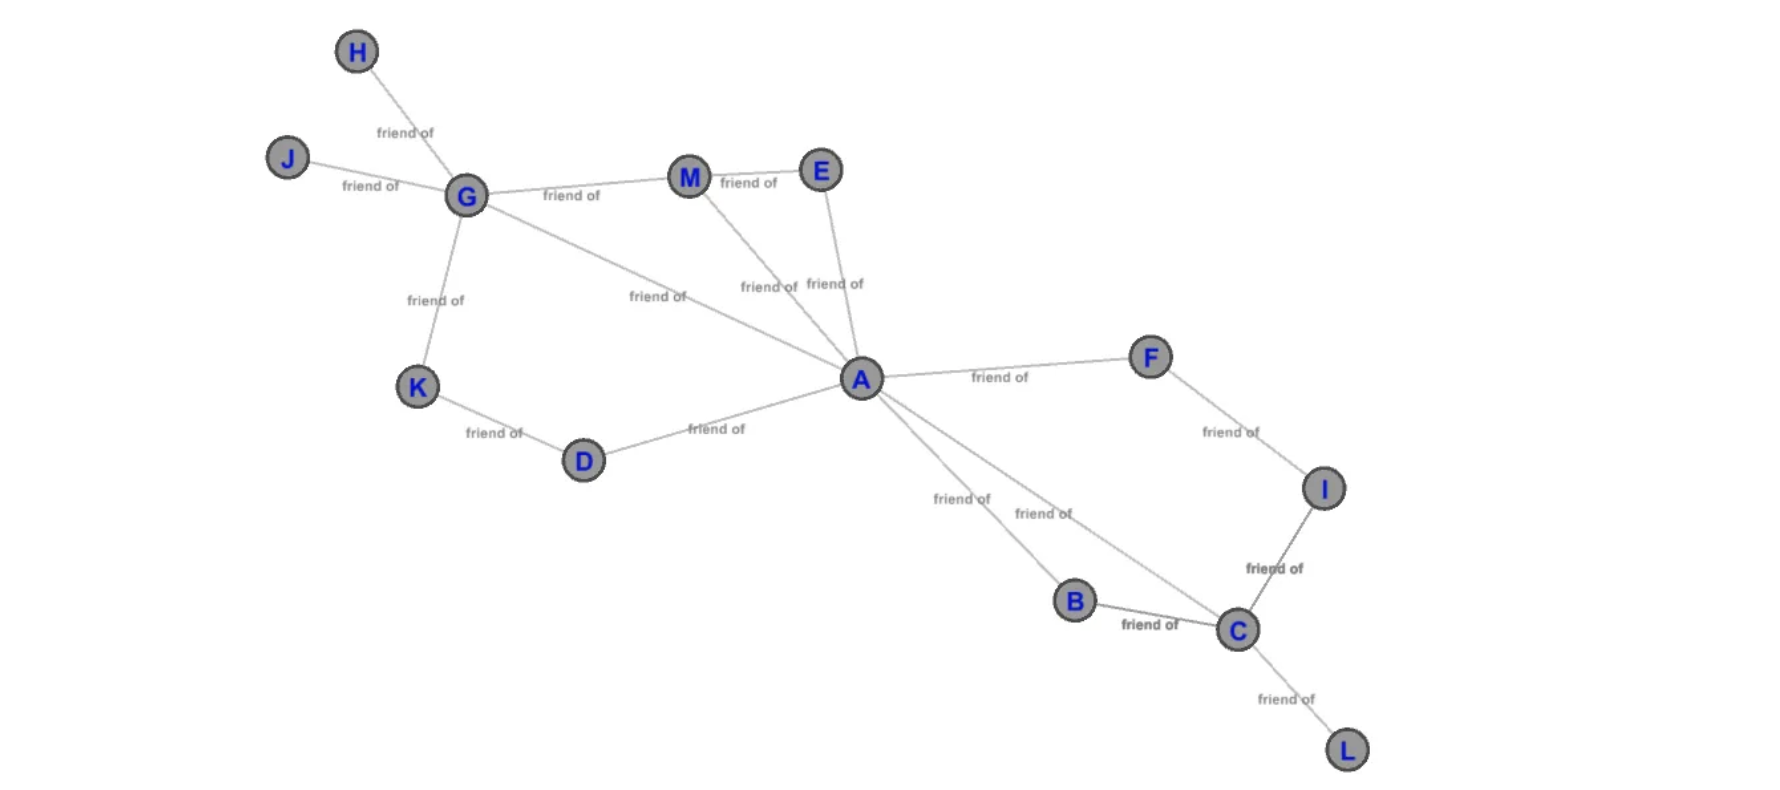

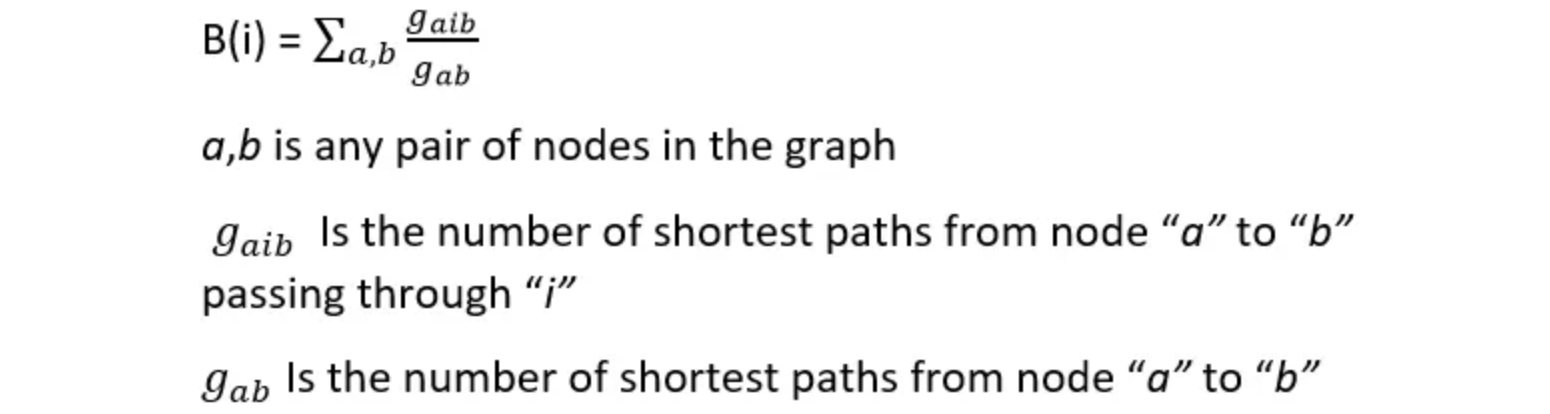

Defines and measures the importance of a node in a network based on how many times it occurs in the shortest path between all pairs of nodes in a graph.

- The algorithm will iterate over all nodes v and w and calculates the shortest paths between them passing through s, as part of the process of computing the betweenness centrality for s.

In [1210]:
def compute_betweenness_centrality(G):
    nodes = {}
    for node in G['nodes']:
        nodes[node['id']] = {
            'neighbors': [],
            'distance': -1,
            'num_paths': 0,
            'dependency': 0,
        }
    for link in G['links']:
        nodes[link['source']]['neighbors'].append(link['target'])

    betweenness = {node_id: 0 for node_id in nodes}

    for s in nodes:
        stack = []
        paths = {w: [] for w in nodes}
#sigma dictionary is used to keep track of the number of shortest paths 
#from the starting node s to each node w in the graph.
        sigma = {w: 0 for w in nodes}
        sigma[s] = 1
#The distance dictionary is used to keep track of the shortest path distance 
#from the source node s to all other nodes in the graph.
#The reason for setting the distance to -1 is to indicates that the node hasn't been reached yet.
        distance = {w: -1 for w in nodes}
        distance[s] = 0
        queue = [s]

        while queue:
            v = queue.pop(0)
            stack.append(v)
            for w in nodes[v]['neighbors']:
                if distance[w] < 0:
                    queue.append(w)
                    distance[w] = distance[v] + 1
                if distance[w] == distance[v] + 1:
                    sigma[w] += sigma[v]
                    paths[w].append(v)
                    
#the division of gaib and gab from the formula picture.
#sigma[v] / sigma[w] term is a fraction that represents the proportion 
#of shortest paths that go through node w and pass through v on their way to the target node.

        delta = {v: 0 for v in nodes}
        while stack:
            w = stack.pop()
            for v in paths[w]:
                delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])
#summing up the delta values over all possible source nodes (excluding the target node itself)
            if w != s:
#the delta[w] values are summed up over all possible source nodes, excluding the target node w itself. 
#This gives the total contribution of node w to the betweenness centrality of the target node.
                betweenness[w] += delta[w]
    return betweenness


In [1211]:
with open('/Users/ivanakolorici-livnjak/Desktop/challenge_graph.json', 'r') as f:
    dataset = json.load(f)
    betweenness = compute_betweenness_centrality(dataset)
    for node_id, centrality in sorted(betweenness.items(), key=lambda x: -x[1])[:10]:
        print(f"Node {node_id} has betweenness centrality score {centrality}")


Node 447825325 has betweenness centrality score 5387.916666666667
Node 13817938 has betweenness centrality score 3686.8333333333335
Node 37704595 has betweenness centrality score 1694.5000000000002
Node 1166106601 has betweenness centrality score 1681.1666666666667
Node 3425534353 has betweenness centrality score 636.0
Node 1373705266 has betweenness centrality score 390.6666666666667
Node 520781652 has betweenness centrality score 252.0
Node 1023340677 has betweenness centrality score 179.0
Node 20934432266 has betweenness centrality score 131.25
Node 24970812 has betweenness centrality score 96.08333333333333


In [1212]:
# Computing the betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Normalizing the betweenness centrality scores
max_bc = max(betweenness_centrality.values())
normalized_bc = {node: score / max_bc for node, score in betweenness_centrality.items()}

# Printing the normalized scores for the top 10 nodes
print("Top 10 nodes by normalized betweenness centrality:")
for i, (node, score) in enumerate(sorted(normalized_bc.items(), key=lambda x: x[1], reverse=True)[:10]):
    print(f"{i+1}. Node {node}: score = {score:.2f}")


Top 10 nodes by normalized betweenness centrality:
1. Node 447825325: score = 1.00
2. Node 37704595: score = 0.32
3. Node 13817938: score = 0.31
4. Node 7644102419: score = 0.24
5. Node 20934432266: score = 0.19
6. Node 3425534353: score = 0.17
7. Node 555363279: score = 0.15
8. Node 21955845: score = 0.15
9. Node 1660812944: score = 0.14
10. Node 1373705266: score = 0.14


 #### <span style="color:brown">Betweenness centrality (networkx)</span>

In [1213]:
# Creating a NetworkX graph object from the dataset
G = nx.Graph()
for node in dataset['nodes']:
    G.add_node(node['id'])
for edge in dataset['links']:
    G.add_edge(edge['source'], edge['target'])

# Calculating betweenness centrality
centrality_dict = nx.betweenness_centrality(G)
for node_id, centrality in sorted(centrality_dict.items(), key=lambda x: -x[1])[:10]:
        print(f"Node {node_id} has betweenness centrality score {centrality}")

Node 447825325 has betweenness centrality score 0.5093989738738358
Node 37704595 has betweenness centrality score 0.16389106434960743
Node 13817938 has betweenness centrality score 0.1579634035384272
Node 7644102419 has betweenness centrality score 0.12405981692482584
Node 20934432266 has betweenness centrality score 0.0974549701801706
Node 3425534353 has betweenness centrality score 0.08485432047404229
Node 555363279 has betweenness centrality score 0.0773365186068174
Node 21955845 has betweenness centrality score 0.0763433190679981
Node 1660812944 has betweenness centrality score 0.07076795329934112
Node 1373705266 has betweenness centrality score 0.06973811276423432


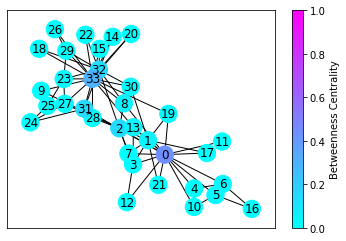

In [1214]:
# Loading the graph
G = nx.karate_club_graph()

# Computing betweenness centrality
bc = nx.betweenness_centrality(G)

# Defining node colors based on betweenness centrality
node_color = list(bc.values())
cmap = plt.cm.get_cmap('cool')  # define a colormap
node_color = [cmap(x) for x in node_color]  # convert betweenness values to colors

# Drawing the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color=node_color, cmap=cmap)

# Adding a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Betweenness Centrality')

plt.show()


### Data from Gephi

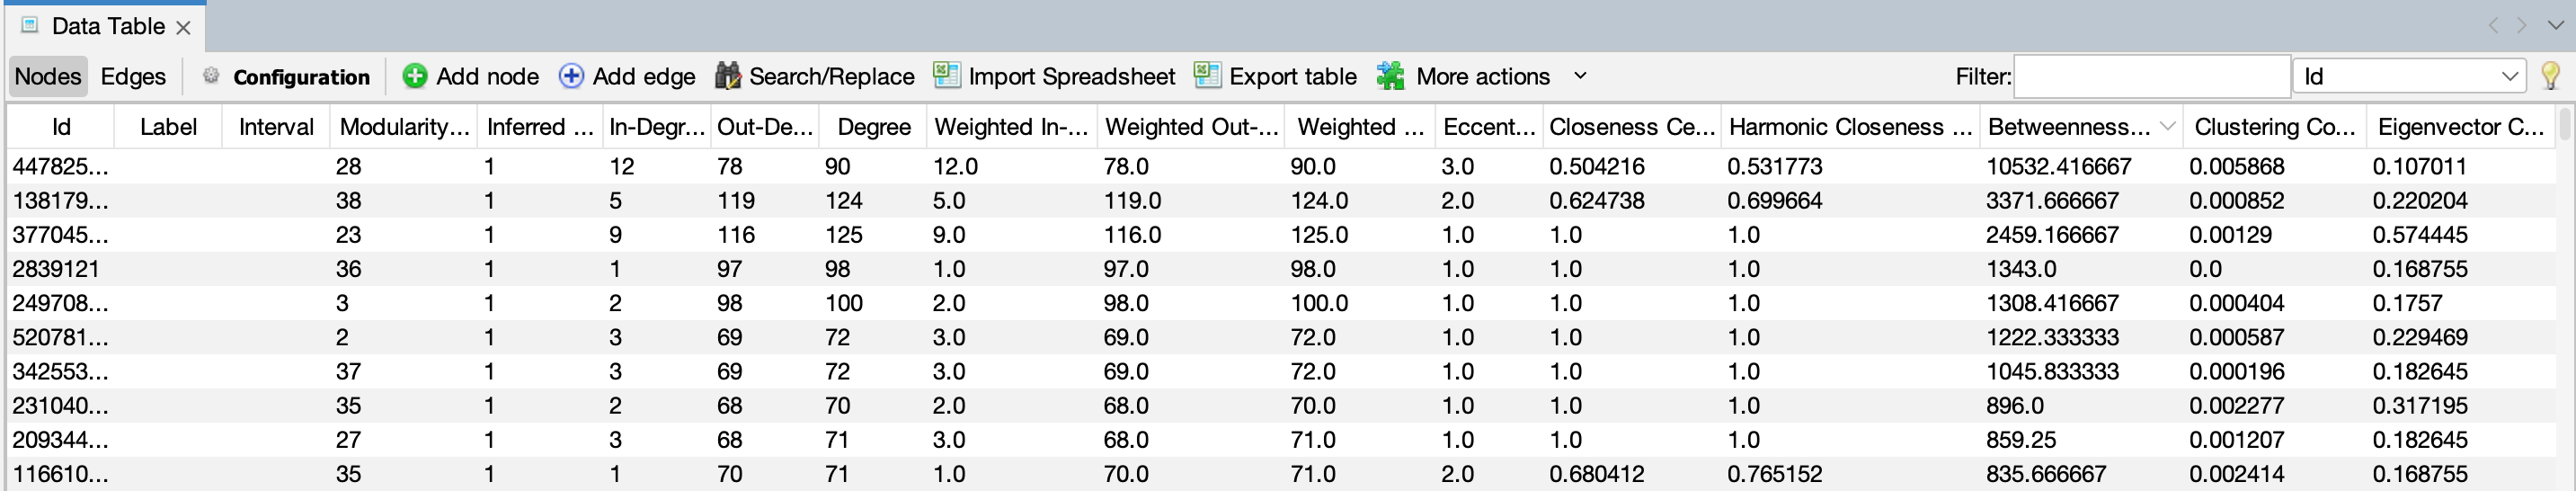

 ### <span style="color:green">Hierarchical clustering</span>

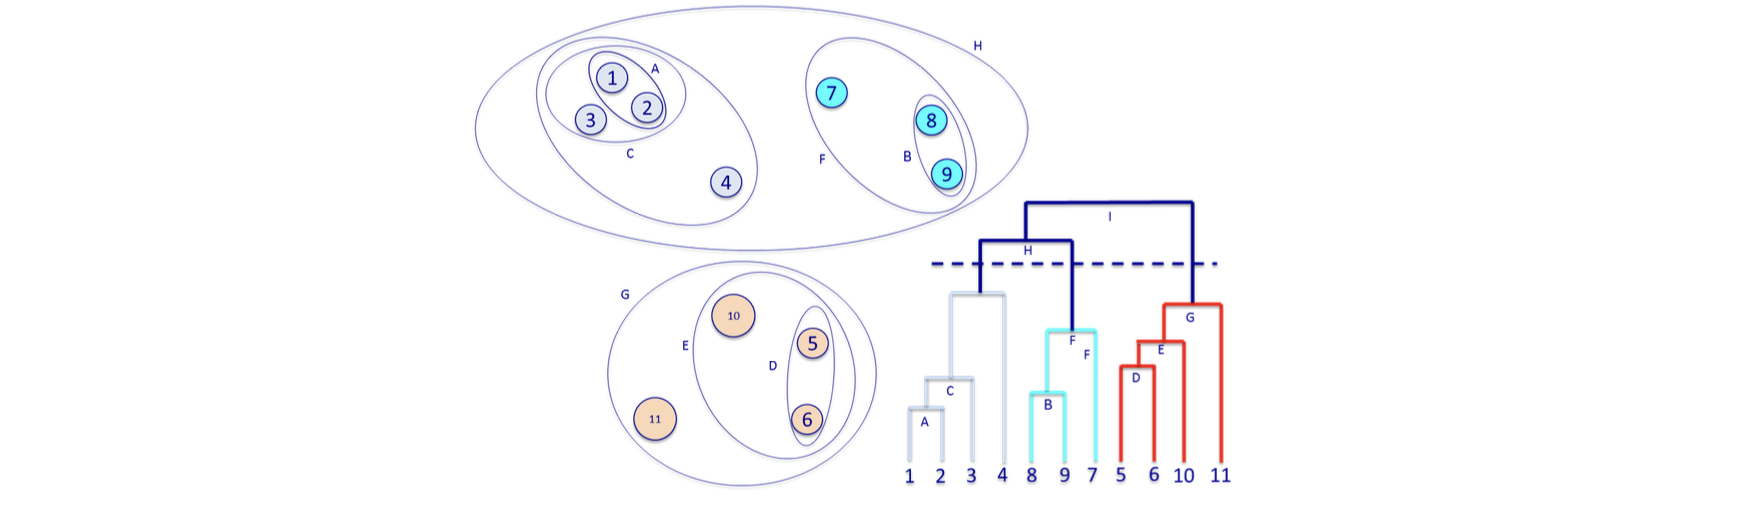

The "ward" method is a hierarchical clustering algorithm that minimizes the variance of the distances between the clusters being merged at each step. I used this one because it is able to produce compact, well-separated clusters.

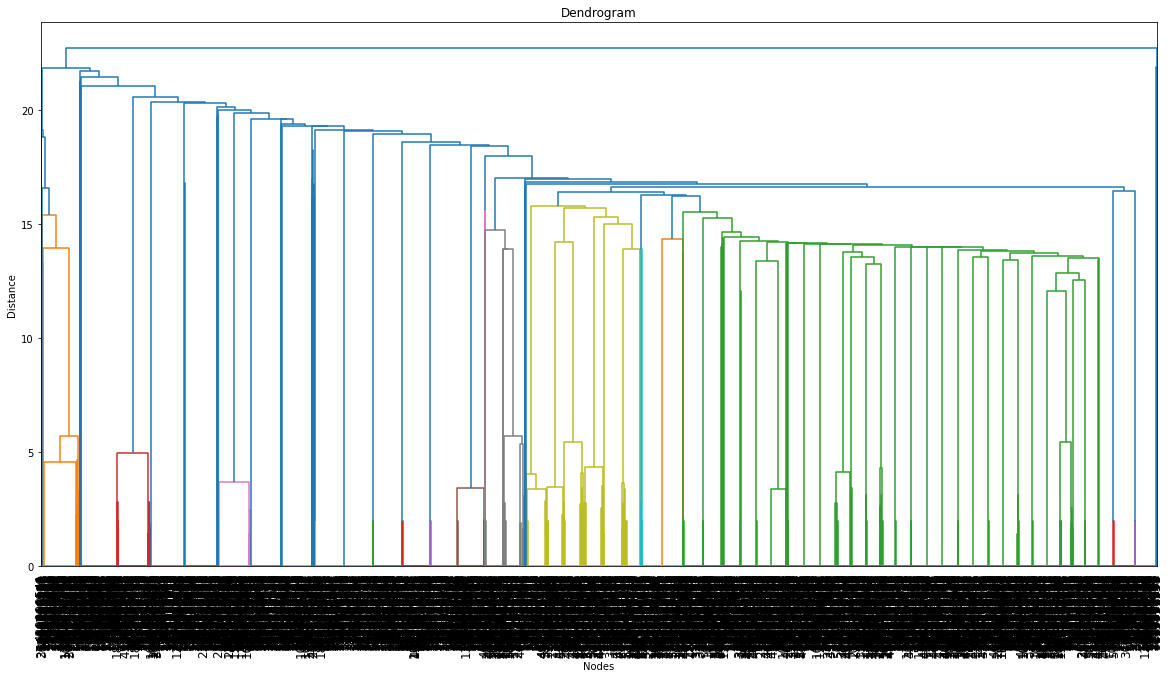

In [1215]:
# Create graph
G = nx.Graph()
node_labels = [node['id'] for node in dataset['nodes']]
G.add_nodes_from(node_labels)
G.add_edges_from([(link['source'], link['target']) for link in dataset['links']])

# Convert graph to distance matrix
D = nx.adjacency_matrix(G).toarray()
D = np.sqrt(2*(1-D))

# Compute hierarchical clustering and plot dendrogram
Z = linkage(D, method='ward', metric='euclidean')

fig, ax = plt.subplots(figsize=(20, 10))
dendrogram(Z, ax=ax, leaf_font_size=12, labels=node_labels, orientation='top')
ax.tick_params(axis='x', which='both', labelrotation=90)
ax.set_xlabel('Nodes')
ax.set_ylabel('Distance')
ax.set_title('Dendrogram')
plt.show()


* Needs  improvement. Would like it to be more organized and easier to distinguish the classes

 ### <span style="color:green">Node Ranking</span>

The node ranking can be used to identify nodes of particular interest or importance, such as highly connected nodes or nodes that act as critical bridges between different parts of the network. Because I don't have a deeper insight into what q1 and q2 represent and how they influence the importance of the node I will assume that qualities q, and the two centrality metrics all contribute equally and rank the nodes with *High, Medium,* or *Low* importance.

### Extracting relevant data from the JSON file and creating a Pandas DataFrame with the node ID, q1, q2, eigenvector centrality, and betweenness centrality.

In [1217]:
# Creating NetworkX graph from data
G = nx.Graph()
for edge in dataset['links']:
    G.add_edge(edge['source'], edge['target'])

# Centralities
centrality_dict = nx.eigenvector_centrality(G)
centrality_dict_bt = nx.betweenness_centrality(G)

# Extract node data
node_dataset = []
for node in dataset['nodes']:
    node_id = node['id']
    q1 = node['q1']
    q2 = node['q2']
    eigenvector_centrality = normalized_centrality_dict[node_id]
    betweenness_centrality = normalized_bc[node_id]

    node_dataset.append([node_id, q1, q2, eigenvector_centrality, betweenness_centrality])

# Create Pandas DataFrame
df = pd.DataFrame(node_dataset, columns=['node_id', 'q1', 'q2', 'eigenvector_centrality', 'betweenness_centrality'])


In [1218]:
# Creating an empty graph
G = nx.Graph()

# Adding nodes to the graph
for node in data['nodes']:
    G.add_node(node['id'], q1=node['q1'], q2=node['q2'])

# Adding edges to the graph
for edge in data['links']:
    G.add_edge(edge['source'], edge['target'])

# Calculating the features
q1 = np.array(list(nx.get_node_attributes(G, 'q1').values())).reshape(-1, 1)
q2 = np.array(list(nx.get_node_attributes(G, 'q2').values())).reshape(-1, 1)
ec = np.array(list(nx.eigenvector_centrality(G).values())).reshape(-1, 1)
bc = np.array(list(nx.betweenness_centrality(G).values())).reshape(-1, 1)

# Scaling the variables ([0-1]) to have them all participate equally in the node ranking process
scaler = MinMaxScaler()
q1_scaled = scaler.fit_transform(q1)
q2_scaled = scaler.fit_transform(q2)
ec_scaled = scaler.fit_transform(ec)
bc_scaled = scaler.fit_transform(bc)

In [1219]:
# Adding the new column to the DataFrame
df['q1_scaled'] = q1_scaled
df['q2_scaled'] = q2_scaled
df['ec_scaled'] = q2_scaled
df['bc_scaled'] = q2_scaled

In [1220]:
#Adding a column contribution
df['contribution'] = df['q1_scaled'] + df['q2_scaled'] + df['ec_scaled']+df['bc_scaled']

In [1221]:
df

,node_id,q1,q2,eigenvector_centrality,betweenness_centrality,q1_scaled,q2_scaled,ec_scaled,bc_scaled,contribution
0,48633953191,266,0.49624100,0.10609178,0.00031649,0.00000000,0.16698949,0.16698949,0.16698949,0.50096847
1,1438155667,2060,0.13592200,0.63278870,0.05561214,0.00007187,0.04573896,0.04573896,0.04573896,0.13728874
2,37754729913,1696,0.03478800,0.55213416,0.04013450,0.00005729,0.01170647,0.01170647,0.01170647,0.03517670
3,45694946584,6882,0.12031400,0.63231429,0.05581264,0.00026504,0.04048673,0.04048673,0.04048673,0.12172522
4,8048097398,1031,0.00000000,0.63182181,0.04632614,0.00003065,0.00000000,0.00000000,0.00000000,0.00003065
...,...,...,...,...,...,...,...,...,...,...
3501,4320866722,9714,0.06733000,0.08958898,0.00000000,0.00037850,0.02265714,0.02265714,0.02265714,0.06834992
3502,22459209,9661,0.00838000,0.08958898,0.00000000,0.00037637,0.00281994,0.00281994,0.00281994,0.00883621
3503,23247946,9161,0.04781000,0.08958898,0.00000000,0.00035634,0.01608849,0.01608849,0.01608849,0.04862181
3504,1828386722,9127,0.02838000,0.08958898,0.00000000,0.00035498,0.00955012,0.00955012,0.00955012,0.02900535


In [1227]:
# Finding the maximum value of the contribution variable
contribution = df['contribution'].max()
print('The maximum value of contribution is:', contribution)

The maximum value of contribution is: 3.002867934517879


In [1223]:
# Defining a function to classify contributions
def classify_contribution(contribution):
    if contribution >=1:
        return 'High'
    elif contribution < 0.3:
        return 'Low'
    else:
        return 'Medium'

# Classification function to the contribution variable
df['contribution_class'] = df['contribution'].apply(classify_contribution)
# Counting the number of values in each class
class_counts = df['contribution_class'].value_counts()

print('High:', class_counts['High'])
print('Medium:', class_counts['Medium'])
print('Low:', class_counts['Low'])

High: 12
Medium: 100
Low: 3394
